In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random


In [5]:
# Upload your edges file
from google.colab import files
uploaded = files.upload()


Saving edges_gephi (2).csv to edges_gephi (2).csv


In [11]:
import pandas as pd
import networkx as nx

# Load the uploaded edges CSV
edges_df = pd.read_csv("edges_gephi (2).csv")

# Preview to confirm column names
print(edges_df.head())

# Build the graph
G_real = nx.Graph()
for _, row in edges_df.iterrows():
    G_real.add_edge(row['source'], row['target'], weight=row['weight'])

# Print basic network info
print(f"Number of nodes: {G_real.number_of_nodes()}")
print(f"Number of edges: {G_real.number_of_edges()}")


                 source            target  weight
0  Agnihotram, Sudhakar  Varshney, Bhavna       1
1          Tan, Yee-Joo  Varshney, Bhavna       2
2          Baric, Ralph  Varshney, Bhavna       2
3         Lal, Sunil K.  Varshney, Bhavna       2
4  Agnihotram, Sudhakar      Tan, Yee-Joo       1
Number of nodes: 1481
Number of edges: 10617


In [3]:
from google.colab import files
uploaded = files.upload()


Saving edges_gephi (2).csv to edges_gephi (2).csv


In [4]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm

# Replace with actual uploaded name if different
edges_df = pd.read_csv("edges_gephi (2).csv")

# Build the real graph
G_real = nx.Graph()
for _, row in edges_df.iterrows():
    G_real.add_edge(row['source'], row['target'], weight=row['weight'])

print(f"Number of nodes: {G_real.number_of_nodes()}")
print(f"Number of edges: {G_real.number_of_edges()}")


Number of nodes: 1481
Number of edges: 10617


In [5]:
# Generate 1000 null models preserving degree sequence
n_graphs = 1000
clustering_vals = []
path_lengths = []

degrees = [d for _, d in G_real.degree()]

for _ in tqdm(range(n_graphs)):
    # Generate configuration model (preserves degree sequence)
    G_rand = nx.configuration_model(degrees)

    # Convert to simple graph (remove parallel edges, self-loops)
    G_rand = nx.Graph(G_rand)
    G_rand.remove_edges_from(nx.selfloop_edges(G_rand))

    # Compute clustering and path length (skip if disconnected)
    if nx.is_connected(G_rand):
        clustering_vals.append(nx.average_clustering(G_rand))
        path_lengths.append(nx.average_shortest_path_length(G_rand))

# Print average results
print(f"\nRandom Networks (n={n_graphs}):")
print(f"Avg. Clustering Coefficient: {np.mean(clustering_vals):.4f} ± {np.std(clustering_vals):.4f}")
print(f"Avg. Path Length: {np.mean(path_lengths):.4f} ± {np.std(path_lengths):.4f}")


100%|██████████| 1000/1000 [43:11<00:00,  2.59s/it]


Random Networks (n=1000):
Avg. Clustering Coefficient: 0.0524 ± 0.0018
Avg. Path Length: 2.9176 ± 0.0059


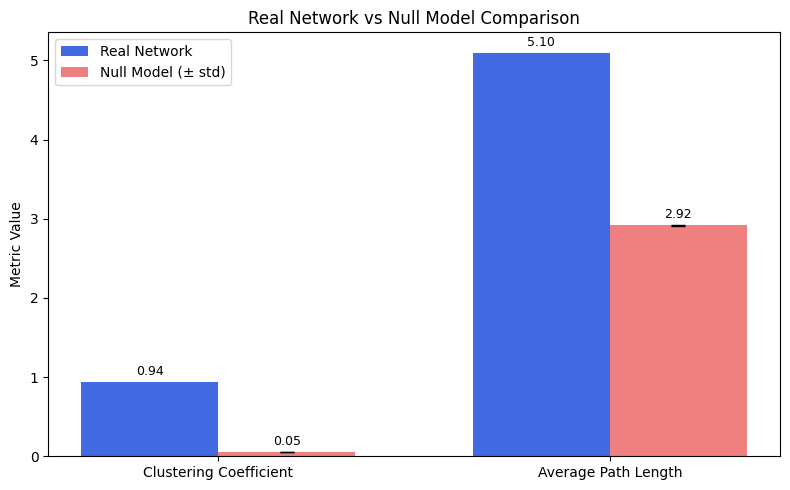

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Real network values
real_clustering = 0.943
real_path_length = 5.1

# Null model values (from your simulation)
null_clustering_mean = 0.0524
null_clustering_std = 0.0018

null_path_length_mean = 2.9176
null_path_length_std = 0.0059

# Labels and values
metrics = ['Clustering Coefficient', 'Average Path Length']
real_values = [real_clustering, real_path_length]
null_means = [null_clustering_mean, null_path_length_mean]
null_errors = [null_clustering_std, null_path_length_std]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8,5))
bars1 = ax.bar(x - width/2, real_values, width, label='Real Network', color='royalblue')
bars2 = ax.bar(x + width/2, null_means, width, yerr=null_errors, capsize=5, label='Null Model (± std)', color='lightcoral')

# Labels and formatting
ax.set_ylabel('Metric Value')
ax.set_title('Real Network vs Null Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()
